<a href="https://colab.research.google.com/github/pyagoubi/Customer-Analysis/blob/main/customer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Pre Cleaning

Please see attached open refine project for pre cleaning activities.

# Load file and libraries

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

The data has columns with mixed data types, this must be considerd when loading.

In [3]:
data = pd.read_excel('/content/drive/MyDrive/upwork2/CutDownfile-Members-and-holdings-16-02-2023_clean.xls')

In [4]:
data.head(5)

,MemberNumber,UserRef,InternalRef2,Country,MemberStatus,DateofDeath,DOB,Sex,ContactforCorres,SARef,...,CurrentUnitsCalculated,CurrentUnitsManual,BookValue,CurrentValueCalculated,ValDate,ValLatest,VotingRights,UserAssClass,UserAssGrp,UnRegFg
0,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,62894.57,285342.01,11/30/2022,285342.01,NaN,NaN,NaN,NaN
1,12,MW00012,1.0,United Kingdom,Partial Drawdown,NaN,6/9/52 0:00,Male,Member,SA0001,...,NaN,NaN,5768.16,5773.80,2/1/2023,5773.80,NaN,NaN,NaN,NaN
2,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,8495.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN
3,19,MW00019,2.0,United Kingdom,Full Drawdown,NaN,12/12/47 0:00,Female,Member,SA0001,...,NaN,NaN,48287.27,47133.99,2/14/2023,47133.99,NaN,NaN,NaN,NaN
4,20,MW00020,4.0,United Kingdom,Full Drawdown,NaN,2/7/48 0:00,Male,Member,SA0001,...,NaN,NaN,16995.00,0.00,12/31/2016,0.00,NaN,NaN,NaN,NaN


# Checking main info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MemberNumber            9799 non-null   int64  
 1   UserRef                 9798 non-null   object 
 2   InternalRef2            16 non-null     float64
 3   Country                 9788 non-null   object 
 4   MemberStatus            9799 non-null   object 
 5   DateofDeath             3 non-null      object 
 6   DOB                     9797 non-null   object 
 7   Sex                     9795 non-null   object 
 8   ContactforCorres        9799 non-null   object 
 9   SARef                   9799 non-null   object 
 10  SchemeName              9795 non-null   object 
 11  BrandName               9792 non-null   object 
 12  BrandRef                9792 non-null   object 
 13  ProposedRetireAge       9793 non-null   float64
 14  ProposedRetireDate      9791 non-null   

The dataset contains 9799 rows and 70 columns. Columns do have different datatypes and are either float, object or int.  
There seems to be missing values at different levels.

# Converting datatypes

Converting float datatypes to int where aappropriate

In [6]:
data.select_dtypes(include=['float64']).columns

Index(['InternalRef2', 'ProposedRetireAge', 'NextRenewalMonth', 'ClusterRef',
       'CSCMan', 'CSCType', 'Dividends', 'DSPAcType', 'FundPercent',
       'InsuredFnd', 'MemberRef', 'PFType', 'PlanRef', 'PriceCurr',
       'PSRAssTyp', 'PurValue', 'RedemDate', 'CurrentUnitsCalculated',
       'CurrentUnitsManual', 'BookValue', 'CurrentValueCalculated',
       'ValLatest', 'VotingRights'],
      dtype='object')

In [7]:
to_int = []
for i in data.select_dtypes(include=['float64']).columns:
  a= data[i].astype(str).str.split('.').str[1].astype('float32').sum()
  if a == 0.0:
    to_int.append(i)
  print(f'{i} sum of fractions: {a}')

InternalRef2 sum of fractions: 0.0
ProposedRetireAge sum of fractions: 0.0
NextRenewalMonth sum of fractions: 0.0
ClusterRef sum of fractions: 0.0
CSCMan sum of fractions: 0.0
CSCType sum of fractions: 0.0
Dividends sum of fractions: 0.0
DSPAcType sum of fractions: 0.0
FundPercent sum of fractions: 75.0
InsuredFnd sum of fractions: 0.0
MemberRef sum of fractions: 0.0
PFType sum of fractions: 0.0
PlanRef sum of fractions: 0.0
PriceCurr sum of fractions: 107118920.0
PSRAssTyp sum of fractions: 0.0
PurValue sum of fractions: 71242.0
RedemDate sum of fractions: 0.0
CurrentUnitsCalculated sum of fractions: 524150.0
CurrentUnitsManual sum of fractions: 505125.0
BookValue sum of fractions: 498009.0
CurrentValueCalculated sum of fractions: 572592.0
ValLatest sum of fractions: 228985.0
VotingRights sum of fractions: 0.0


In [8]:
data[to_int] =data[to_int].astype('Int32')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9799 entries, 0 to 9798
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MemberNumber            9799 non-null   int64  
 1   UserRef                 9798 non-null   object 
 2   InternalRef2            16 non-null     Int32  
 3   Country                 9788 non-null   object 
 4   MemberStatus            9799 non-null   object 
 5   DateofDeath             3 non-null      object 
 6   DOB                     9797 non-null   object 
 7   Sex                     9795 non-null   object 
 8   ContactforCorres        9799 non-null   object 
 9   SARef                   9799 non-null   object 
 10  SchemeName              9795 non-null   object 
 11  BrandName               9792 non-null   object 
 12  BrandRef                9792 non-null   object 
 13  ProposedRetireAge       9793 non-null   Int32  
 14  ProposedRetireDate      9791 non-null   

All columns with ints are converted to int-datatype

In [13]:
for i in data.select_dtypes(include=['object']).columns:
  display(data[~(data[i].isnull())][[i]].head(3))

,UserRef
0,MW00012
1,MW00012
2,MW00019


,Country
0,United Kingdom
1,United Kingdom
2,United Kingdom


,MemberStatus
0,Partial Drawdown
1,Partial Drawdown
2,Full Drawdown


,DateofDeath
157,12/8/20 0:00
158,12/8/20 0:00
159,12/8/20 0:00


,DOB
0,6/9/52 0:00
1,6/9/52 0:00
2,12/12/47 0:00


,Sex
0,Male
1,Male
2,Female


,ContactforCorres
0,Member
1,Member
2,Member


,SARef
0,SA0001
1,SA0001
2,SA0001


,SchemeName
0,MW SIPP
1,MW SIPP
2,MW SIPP


,BrandName
0,MW Staff
1,MW Staff
2,MW Staff


,BrandRef
0,SA000101
1,SA000101
2,SA000101


,ProposedRetireDate
0,9/6/2027
1,9/6/2027
2,12/12/2022


,75thBirthday
0,9/6/2027
1,9/6/2027
2,12/12/2022


,75before2262010
0,N
1,N
2,N


,AdvAppointedDate
0,15/5/2018
1,15/5/2018
16,22/5/2018


,77thBirthday
0,6/9/29 0:00
1,6/9/29 0:00
2,12/12/24 0:00


,CommencementDate
0,4/22/04 0:00
1,4/22/04 0:00
2,5/26/04 0:00


,NextRenewalDate
0,4/2/24 0:00
1,4/2/24 0:00
2,4/1/24 0:00


,SIPPRole
0,Investment Advisor
1,Investment Advisor
16,Intermediary


,AdviserRef
0,A1444
1,A1444
16,A1447


,AdviserType
0,Investment Manager
1,Investment Manager
16,IFA


,AdviserCountry
0,United Kingdom
1,United Kingdom
16,United Kingdom


,AdviserDirectLine
599,0161 4478351
600,0161 4478351
601,0161 4478351


,AdviserCompanyName
0,EFG Harris Allday
1,EFG Harris Allday
16,DSG Wealth Management Ltd


,CoRegNo
75,7486642
86,7486642
133,5152335


,DiscMan
9,Stocktrade
12,Ascentric
26,Stocktrade


,FundMan
0,EFG Harris Allday
1,Metro Bank
3,Metro Bank


,HoldStatus
0,Current
1,Current
2,Current


,HoldType
0,Investment Portfolio
1,Bank Account
2,Property


,InSpecie
157,Yes
403,TV
408,TV


,InsRef
7,IN0295
8,IN0295
9,IN0043


,Notes
7,Old Account Number: 199320 01343 880344
8,Dividends are automatically reinvested Old Acc...
12,Old policy number - 11381527


,PSRAcqFrm
25,AL
75,AL
76,AL


,PSRAssOth
25,OEIC
76,Forestry
77,Forestry


,PurDate
0,6/29/2004
1,10/22/2018
2,10/3/2007


,RepDt
162,1/5/2022
163,1/5/2022
164,1/5/2022


,SedolRef
7,2
8,112
9,1


,ValDate
0,11/30/2022
1,2/1/2023
2,12/31/2016


,UserAssClass
7,Unit Trust
8,UCITS
18,Investment Portfolio


,UserAssGrp
7,Collectives
8,Collectives
18,Investment Portfolios


,UnRegFg
75,Yes
76,Yes
77,Yes


The variable SedolRef should be converted to int.

In [ ]:
data['MemberNumber'].nunique()

4689

# Checking Member Number

In [14]:
data[['MemberNumber', 'DOB']]

,MemberNumber,DOB
0,12,6/9/52 0:00
1,12,6/9/52 0:00
2,19,12/12/47 0:00
3,19,12/12/47 0:00
4,20,2/7/48 0:00
...,...,...
9794,2765,10/9/60 0:00
9795,7211,2/6/62 0:00
9796,7211,2/6/62 0:00
9797,7213,4/18/67 0:00


MemberNumber is not unique, meaning for customer focused analysis date must be grouped per MemberNumber

# Redundant columns

Some information seem redundant

In [15]:
data[['NextRenewalDate', 'NextRenewalMonth', 'NextRenewalDay']]

,NextRenewalDate,NextRenewalMonth,NextRenewalDay
0,4/2/24 0:00,4,2
1,4/2/24 0:00,4,2
2,4/1/24 0:00,4,1
3,4/1/24 0:00,4,1
4,4/1/24 0:00,4,1
...,...,...,...
9794,6/29/23 0:00,6,29
9795,10/12/22 0:00,10,12
9796,10/12/22 0:00,10,12
9797,10/12/22 0:00,10,12


In [16]:
data[['CommencementDate', 'CommencementMonth', 'CommencementYear']]

,CommencementDate,CommencementMonth,CommencementYear
0,4/22/04 0:00,4,2004
1,4/22/04 0:00,4,2004
2,5/26/04 0:00,5,2004
3,5/26/04 0:00,5,2004
4,5/26/04 0:00,5,2004
...,...,...,...
9794,6/29/17 0:00,6,2017
9795,10/12/22 0:00,10,2022
9796,10/12/22 0:00,10,2022
9797,10/12/22 0:00,10,2022


We can drop the columns: 'CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'

In [17]:
#drop columns
data.drop(['CommencementMonth', 'CommencementYear', 'NextRenewalMonth', 'NextRenewalDay'], axis=1, inplace=True)

Birthday information can be inferred 

In [18]:
data[['75thBirthday', '75before2262010', '77thBirthday', 'DOB'] ].isnull().sum()

75thBirthday       2
75before2262010    0
77thBirthday       2
DOB                2
dtype: int64

In [19]:
data.loc[(data['75thBirthday'].isnull()) & (data['77thBirthday'].isnull()) & (data['DOB'].isnull()) , '75before2262010']

423    N
424    N
Name: 75before2262010, dtype: object

Since NAN values are the same, there is no additional information in keeping the birthday columns.

In [20]:
#drop columns
data.drop(['75thBirthday', '77thBirthday', '75before2262010'], axis=1, inplace=True)

# Checking missing values

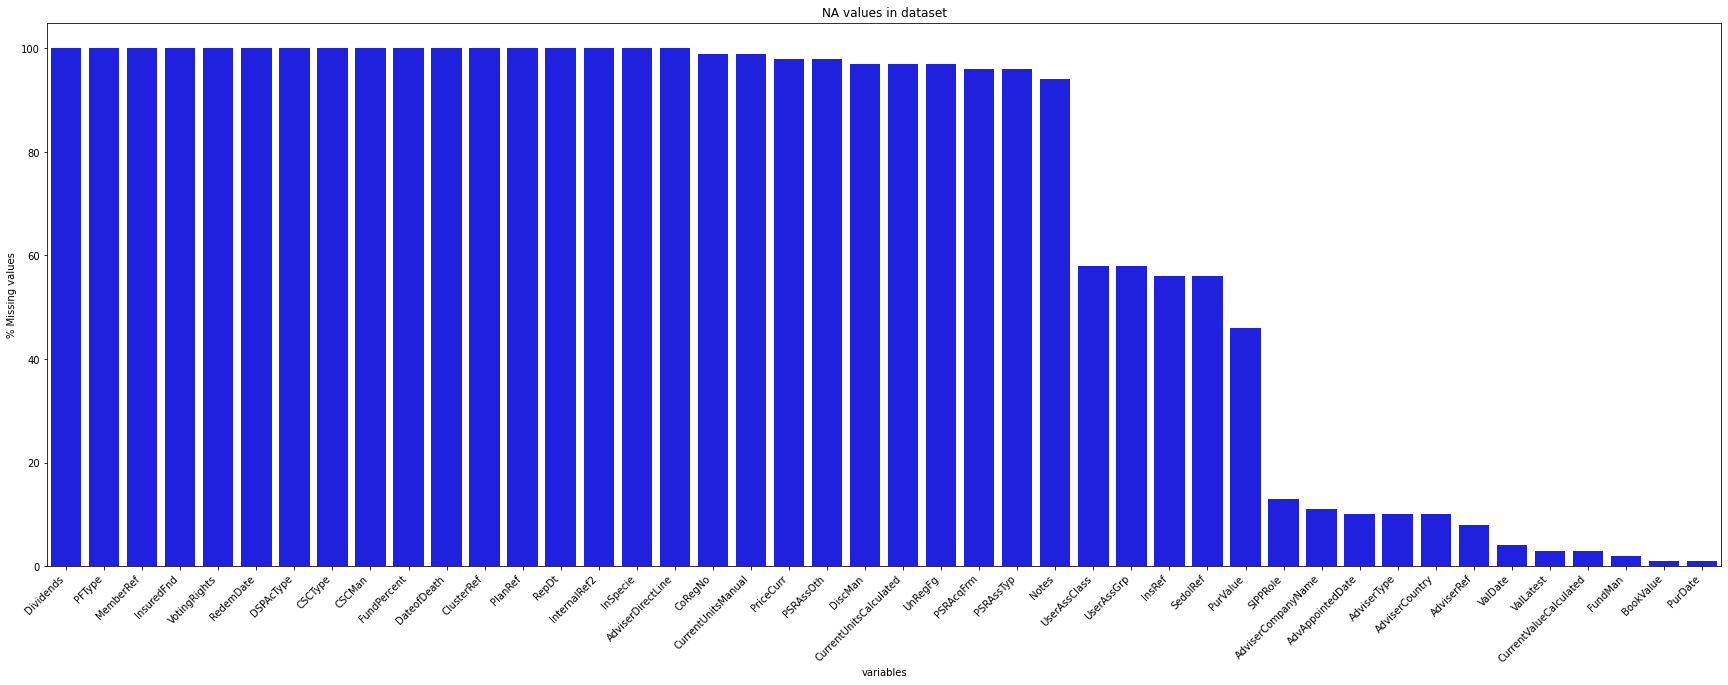

In [22]:
#create a dataframes with percentages of missing values
missing = pd.DataFrame(columns = ['% Missing values'],data = 100*round(data.isnull().sum().sort_values(ascending = False)/len(data),2))
missing_nz = missing[missing['% Missing values']>0.0].reset_index().rename(columns={'index': 'variables'})


#Plot missing values
#plt.style.use('ggplot')
fig, ax = plt.subplots(1,1, figsize=(30,10))

ax.set_title('NA values in dataset')
sns.barplot(data=missing_nz,x=missing_nz.variables,y=missing_nz['% Missing values'], orient = 'v', ax = ax, color ='b')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [23]:
print(missing[missing['% Missing values']>90].count())
print(missing[(missing['% Missing values']>40) & (missing['% Missing values']<=60)].count())
print(missing[missing['% Missing values']<=20].count())

% Missing values    27
dtype: int64
% Missing values    5
dtype: int64
% Missing values    31
dtype: int64


Missing values can be classified as follows  
* 27 variables do have a high portion of missing values (close to 100%) --> these variables will be dropped 
* 5 variables have a portion of missing values between 40% and 60% 
* 31 variebles have less than 20% missing values

In [24]:
# dropping variables with very high No of missing values
remove = list(missing[missing['% Missing values']>90].index)
data.drop(remove, inplace =True, axis =1)

Categorical features are populated with column mode and numeric features are pupulated with column mean.

In [145]:
for i in data.select_dtypes(include=['object']).columns:
  data[i].fillna(data[i].mode(), inplace=True)

for i in data.select_dtypes(include=['float64']).columns:
  data[i].fillna(data[i].mean(), inplace=True)

for i in data.select_dtypes(include=['int64']).columns:
  data[i].fillna(data[i].mode(), inplace=True)

for i in data.select_dtypes(include=['Int32']).columns:
  data[i].fillna(data[i].mode(), inplace=True)


# Check duplicated rows

In [25]:
data.duplicated().sum()

0

No duplicate rows

# Analysing customer variables

Age at commencement

In [26]:
data['DOB'].isnull().sum()

2

In [60]:
#creating dataframe with unique members
df_commencement = data[['MemberNumber', 'DOB', 'CommencementDate']]
df_commencement.duplicated


<bound method DataFrame.duplicated of       MemberNumber            DOB CommencementDate
0               12    6/9/52 0:00     4/22/04 0:00
1               12    6/9/52 0:00     4/22/04 0:00
2               19  12/12/47 0:00     5/26/04 0:00
3               19  12/12/47 0:00     5/26/04 0:00
4               20    2/7/48 0:00     5/26/04 0:00
...            ...            ...              ...
9794          2765   10/9/60 0:00     6/29/17 0:00
9795          7211    2/6/62 0:00    10/12/22 0:00
9796          7211    2/6/62 0:00    10/12/22 0:00
9797          7213   4/18/67 0:00    10/12/22 0:00
9798          7213   4/18/67 0:00    10/12/22 0:00

[9799 rows x 3 columns]>

In [61]:
# removing duplicates

df_commencement = df_commencement.drop_duplicates()

In [ ]:
# formating DOB column
df_commencement['DOB'] = pd.to_datetime(data['DOB'])
df_commencement.loc[df_commencement['DOB'].dt.year >= 2020, 'DOB'] -= pd.DateOffset(years=100)

In [ ]:
# calculate Age at commencement by CommencementDate - DOB (date of birth)

df_commencement['CommencementDate'] = pd.to_datetime(df_commencement['CommencementDate'])

df_commencement['Age at commencement'] = (df_commencement['CommencementDate'] - df_commencement['DOB']).dt.days / 365.25

In [64]:
df_commencement.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 9797
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MemberNumber         4689 non-null   int64         
 1   DOB                  4687 non-null   datetime64[ns]
 2   CommencementDate     4689 non-null   datetime64[ns]
 3   Age at commencement  4687 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 183.2 KB


In [65]:
df_commencement['Age at commencement'].mean()

52.39262661209073

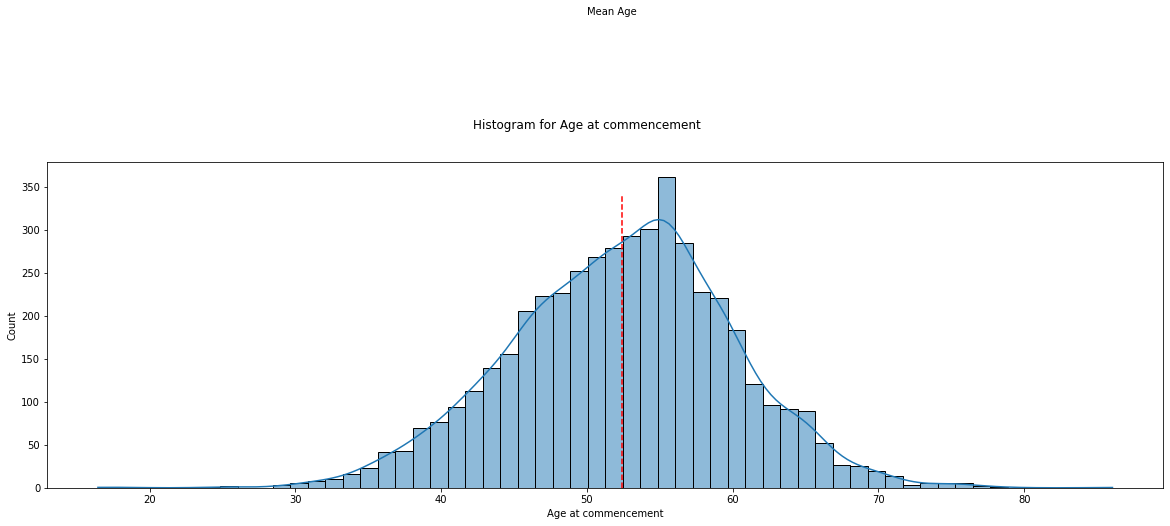

In [ ]:
# Plot the data
fig, axes = plt.subplots(1, 1, figsize = (20, 6))
fig.suptitle('Histogram for Age at commencement')
sns.histplot(x = 'Age at commencement', data = df_commencement, kde = True, ax = axes)
plt.axvline(x=df_commencement['Age at commencement'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.text(50,550,'Mean Age')
plt.show()


The average age of commencement is at 52 years. The distribution is slightly left-skewed

In [80]:
df_commencement['Age at commencement'].describe().T

count    4687.000000
mean       52.392627
std         7.588930
min        16.449008
25%        47.347023
50%        52.815880
75%        57.423682
max        86.053388
Name: Age at commencement, dtype: float64

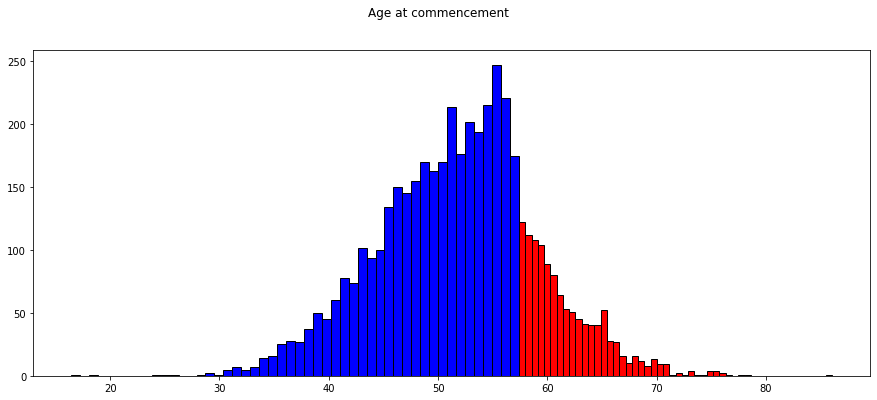

In [79]:

fig, axes = plt.subplots(1, 1, figsize = (15, 6))
fig.suptitle('Age at commencement')
plt.hist(x=df_commencement.loc[df_commencement['Age at commencement']< 57.42,  'Age at commencement'], bins = 50, color = 'b', histtype= 'bar', edgecolor = "black")
plt.hist(x=df_commencement.loc[df_commencement['Age at commencement']>= 57.42,  'Age at commencement'], bins = 50, color = 'r', edgecolor = "black")
plt.show()

Above graph marks the 75% quantile for age of commencement.

<AxesSubplot:xlabel='Age at commencement'>

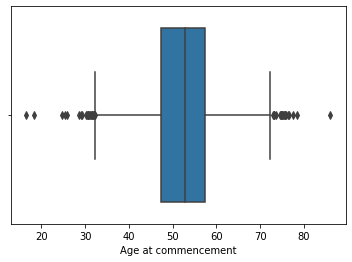

In [ ]:
sns.boxplot(x=df_commencement['Age at commencement'] )

In [81]:
# removing outliers

Q1 = df_commencement['Age at commencement'].quantile(0.25)
Q3 = df_commencement['Age at commencement'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR

print(f'Values above {upper} are considered outliers and will be dropped')

df_commencement_clean = df_commencement[~((df_commencement['Age at commencement']>upper) | (df_commencement['Age at commencement']<lower)) ]

del lower, upper, Q1, Q3, IQR

df_commencement_clean['Age at commencement'].describe().T

Values above 72.53867214236826 are considered outliers and will be dropped


count    4644.000000
mean       52.408510
std         7.277484
min        32.284736
25%        47.405886
50%        52.830938
75%        57.333333
max        72.355921
Name: Age at commencement, dtype: float64

For the cleaned dataset the range is 32 - 72 years. The mean is at 52 years

In [87]:
#checking 5% and 95% quantile
print(df_commencement['Age at commencement'].quantile(0.05))
print(df_commencement['Age at commencement'].quantile(0.95))

39.41218343600274
64.67761806981518


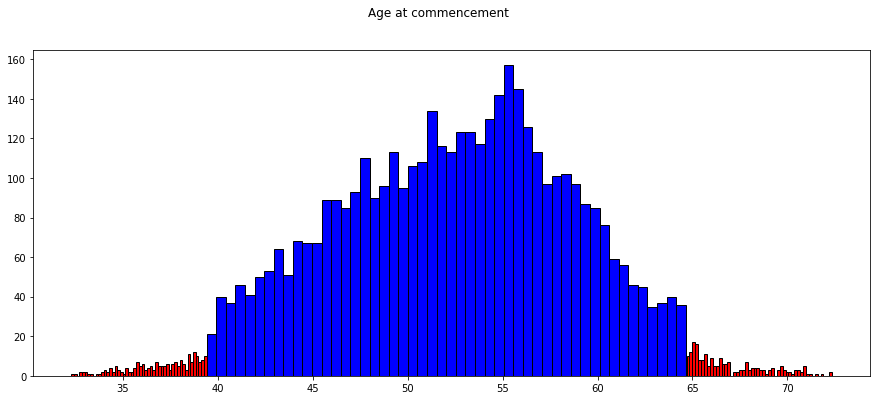

In [84]:
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
fig.suptitle('Age at commencement')
plt.hist(x=df_commencement_clean.loc[df_commencement_clean['Age at commencement']< df_commencement['Age at commencement'].quantile(0.05),  'Age at commencement'], bins = 50, color = 'r', histtype= 'bar', edgecolor = "black")
plt.hist(x=df_commencement_clean.loc[(df_commencement_clean['Age at commencement']>= df_commencement['Age at commencement'].quantile(0.05)) &
                                     (df_commencement_clean['Age at commencement']< df_commencement['Age at commencement'].quantile(0.95))
                                     ,'Age at commencement'], bins = 50, color = 'b', edgecolor = "black")
plt.hist(x=df_commencement_clean.loc[(df_commencement_clean['Age at commencement']>= df_commencement['Age at commencement'].quantile(0.95)) 
                                     ,'Age at commencement'], bins = 50, color = 'r', edgecolor = "black")
plt.show()

90% of customers are between 39 and 65 years

Size of Investment

In [88]:
data['ValLatest'].isnull().sum()

341

There is a very small number of NAN values, we use the column mean as imputation.

In [89]:
data['ValLatest'] = data['ValLatest'].fillna(data['ValLatest'].mean())

In [90]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.groupby('MemberNumber')['ValLatest'].sum().describe()

count      4689.00
mean     294191.09
std      348794.66
min        -180.00
25%       90312.47
50%      181201.00
75%      380585.82
max     4623396.00
Name: ValLatest, dtype: float64

At average we have 294.191 investment volume.
50% are below 181.201

Plotting distribution without accounting for outliers

<ipython-input-91-350feb04691e>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  o.set_xticklabels(xlabels)


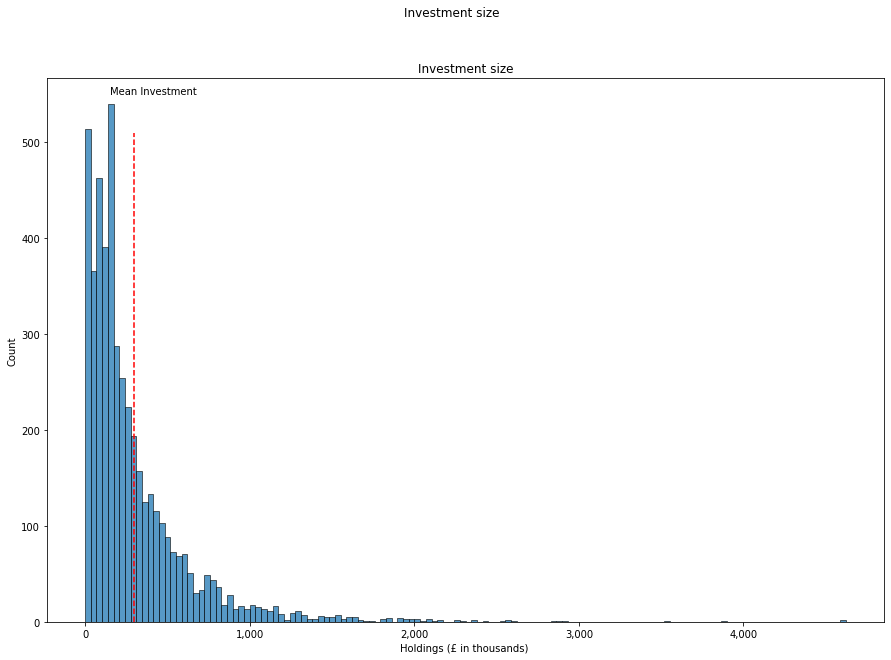

In [91]:
# Plot the data
df_inv = pd.DataFrame(data.groupby('MemberNumber')['ValLatest'].sum())
df_inv.reset_index(inplace=True)

fig, axes = plt.subplots(1, 1, figsize = (15, 10))
fig.suptitle('Investment size')
o = sns.histplot(x = 'ValLatest', data = df_inv, ax = axes)
xlabels = ['{:,.0f}'.format(x) for x in o.get_xticks()/1000]
plt.axvline(x=df_inv['ValLatest'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.text(150000,550,'Mean Investment')
o.set_xticklabels(xlabels)
axes.set(xlabel='Holdings (£ in thousands) ',
       ylabel='Count',
       title='Investment size')
#axes.ticklabel_format(useOffset=False, style='plain')

plt.show()

Check outliers

<AxesSubplot:>

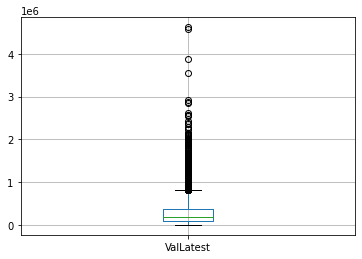

In [92]:
df_inv.boxplot('ValLatest')

There are many outliers on the upper side as can be seen by the whiskers plot.

Handling Outliers for Investment size

In [93]:
Q1 = df_inv['ValLatest'].quantile(0.25)
Q3 = df_inv['ValLatest'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1- 1.5*IQR
upper = Q3+ 1.5*IQR

In [94]:
print(f'Values above {upper} are considered outliers and will be dropped')

Values above 815995.845 are considered outliers and will be dropped


In [96]:
df_inv_clean = df_inv[~(df_inv['ValLatest']>upper)]

Investment size without outliers

<ipython-input-97-e03afbf6248e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels)


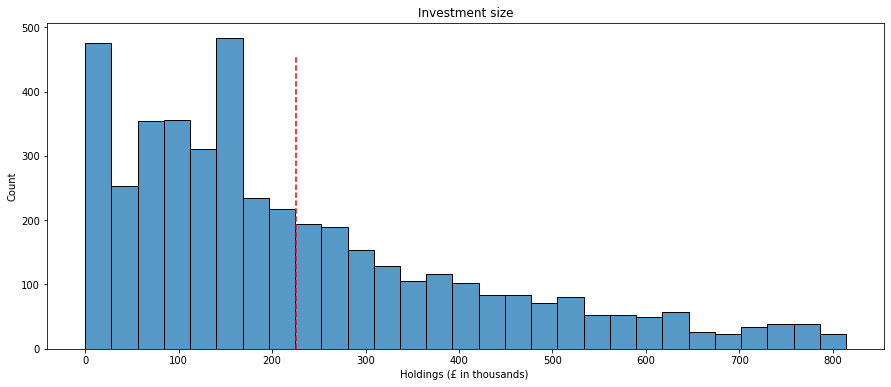

In [97]:
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
#fig.suptitle('Investment size')
g = sns.histplot(x = 'ValLatest', data = df_inv_clean)
xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()/1000]
g.set_xticklabels(xlabels)
axes.set(xlabel='Holdings (£ in thousands) ',
       ylabel='Count',
       title='Investment size')
plt.axvline(x=df_inv_clean['ValLatest'].mean(), linestyle="--", label = 'Mean', ymax = 0.9,
            color='red')
plt.show()


In [ ]:
df_inv_clean['ValLatest'].mean()

225163.64325668477

The mean without outliers is at 225.163.

In [ ]:
df_inv_clean['ValLatest'].describe()

count     4384.00
mean    225163.64
std     190146.89
min       -180.00
25%      85058.05
50%     165035.70
75%     322898.22
max     814197.91
Name: ValLatest, dtype: float64

In [ ]:
df_inv_clean['ValLatest'].count()/df_inv['ValLatest'].count()

0.9349541480059714

About 93 % of all customers hold holdings between -180 and 814.197

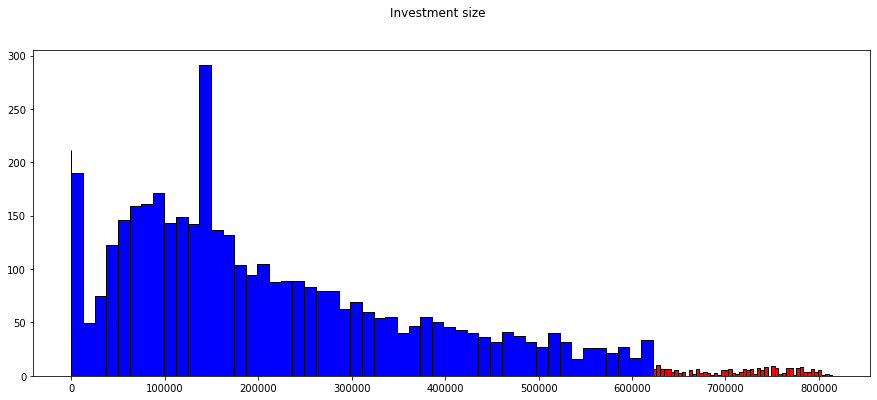

In [100]:
fig, axes = plt.subplots(1, 1, figsize = (15, 6))
fig.suptitle('Investment size')
plt.hist(x=df_inv_clean.loc[df_inv_clean['ValLatest']< df_inv_clean['ValLatest'].quantile(0.05),  'ValLatest'], bins = 50, color = 'r', histtype= 'bar', edgecolor = "black")
plt.hist(x=df_inv_clean.loc[(df_inv_clean['ValLatest']>= df_inv_clean['ValLatest'].quantile(0.05)) &
                                     (df_inv_clean['ValLatest']< df_inv_clean['ValLatest'].quantile(0.95))
                                     ,'ValLatest'], bins = 50, color = 'b', edgecolor = "black")
plt.hist(x=df_inv_clean.loc[(df_inv_clean['ValLatest']>= df_inv_clean['ValLatest'].quantile(0.95)) 
                                     ,'ValLatest'], bins = 50, color = 'r', edgecolor = "black")
plt.show()

In [99]:
print(df_inv_clean['ValLatest'].quantile(0.05))
print(df_inv_clean['ValLatest'].quantile(0.95))

11.685000000000024
622256.5544999999


In [101]:
df_inv_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
MemberNumber,4384.00,4406.01,1952.89,3.00,3062.75,4577.50,6012.25,7446.00
ValLatest,4384.00,225163.64,190146.89,-180.00,85058.05,165035.70,322898.22,814197.91


# Source of customer

In [103]:
# create Dataframe with source per member

df_source = data[['MemberNumber','AdviserCompanyName']].copy()

df_source = df_source.drop_duplicates()


In [104]:
df_source['AdviserCompanyName'].value_counts()

Hoxton Capital Management FZE                          480
Hoxton Capital Management USA LLC                      187
Blacktower Financial Management (Int) Ltd              146
Sovereign Group                                        143
AHR Financial Consultation & Financial Analysis LLC    134
                                                      ... 
Strabens Hall Ltd                                        1
Ecclesiastical Financial Advisory Services Ltd           1
Wealthmasters Financial Management Ltd                   1
Alan Parkinson T/A CPD Financial Advisors                1
Fairstone Financial Management (City) Ltd                1
Name: AdviserCompanyName, Length: 441, dtype: int64

The most used advisor company is Hoxton Capital Management

In [123]:
df_source_vc = pd.DataFrame(df_source['AdviserCompanyName'].value_counts())

In [112]:
df_source_comp= pd.DataFrame((df_source['AdviserCompanyName'].value_counts()/ df_source['AdviserCompanyName'].value_counts().sum()).cumsum())

In [144]:
df_source_comp[df_source_comp['AdviserCompanyName']<0.3]

,AdviserCompanyName
Hoxton Capital Management FZE,0.11
Hoxton Capital Management USA LLC,0.16
Blacktower Financial Management (Int) Ltd,0.19
Sovereign Group,0.23
AHR Financial Consultation & Financial Analysis LLC,0.26
deVere Acuma Insurance Brokers LLC,0.29


<function matplotlib.pyplot.show(close=None, block=None)>

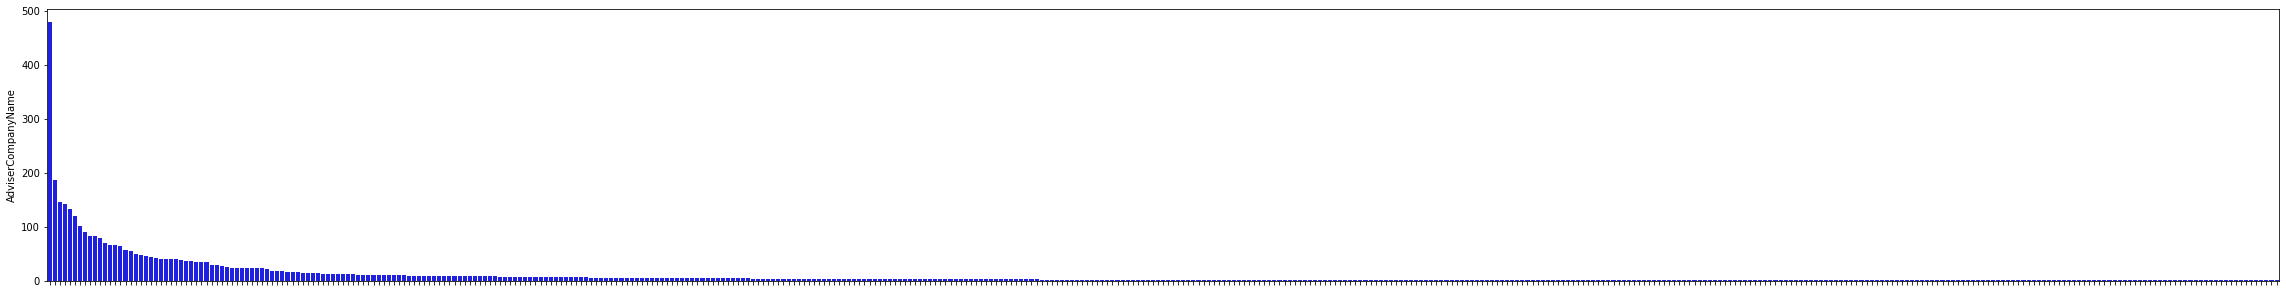

In [126]:

fig, axes = plt.subplots(1, 1, figsize = (40, 5))
sns.barplot(data = df_source_vc, x=df_source_vc.index, y='AdviserCompanyName', color = 'b')
axes.set(xticklabels=[])
plt.show

Remove those who onle have 1 count

In [127]:
df_source_vc[(df_source_vc['AdviserCompanyName'] ==1)]

,AdviserCompanyName
Lievesely and Associates Pty Ltd,1
Vesta Wealth Limited,1
Audley Wealth Ltd - History,1
Acuma Hong Kong Ltd,1
Blacktower Financial Management (Int) Ltd ta,1
...,...
Strabens Hall Ltd,1
Ecclesiastical Financial Advisory Services Ltd,1
Wealthmasters Financial Management Ltd,1
Alan Parkinson T/A CPD Financial Advisors,1


In [130]:
df_source_vc.loc[df_source_vc['AdviserCompanyName'] ==1, 'AdviserCompanyName'].sum()/ df_source_vc['AdviserCompanyName'].sum()

0.04302600472813239

In [138]:
df_source_vc.loc[~(df_source_vc['AdviserCompanyName'] <= 10)]

,AdviserCompanyName
Hoxton Capital Management FZE,480
Hoxton Capital Management USA LLC,187
Blacktower Financial Management (Int) Ltd,146
Sovereign Group,143
AHR Financial Consultation & Financial Analysis LLC,134
...,...
Misthos Group Malaysia Inc,12
Pyrmont Wealth Management Ltd,11
Beaufort Asset Management Limited,11
IUK Gobal SARL,11


<function matplotlib.pyplot.show(close=None, block=None)>

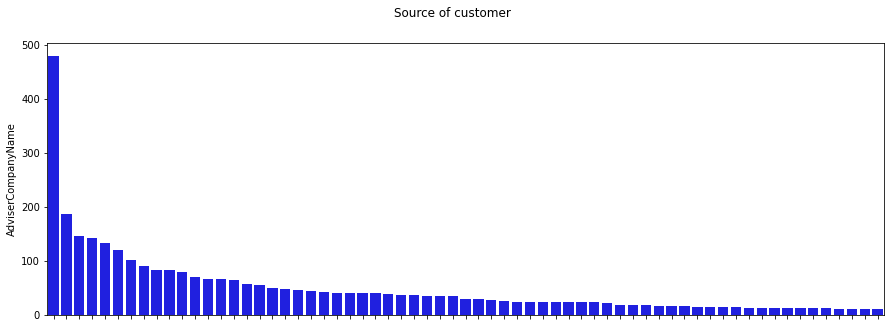

In [143]:
fig, axes = plt.subplots(1, 1, figsize = (15, 5))
fig.suptitle('Source of customer')
sns.barplot(data = df_source_vc.loc[~(df_source_vc['AdviserCompanyName'] <= 10)], x=df_source_vc.loc[~(df_source_vc['AdviserCompanyName'] <= 10)].index, y='AdviserCompanyName', color = 'b')
axes.set(xticklabels=[])
plt.show

Export data

In [146]:
data.to_excel("/content/drive/MyDrive/upwork2/output.xlsx")  

In [147]:
%%shell
jupyter nbconvert --to html ///content/customer_analysis.ipynb

[NbConvertApp] Converting notebook ///content/customer_analysis.ipynb to html
[NbConvertApp] Writing 1128301 bytes to /content/customer_analysis.html
